<a href="https://colab.research.google.com/github/RamSakamuri/deeplearning/blob/main/Implementation_of_LeNet_5_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementation of LeNet-5 using Keras.

This is created by Yann Lecun, one of the founding fathers of Deep Learning.Lenet is a 10 class classifier to classify digits.

1.   Subsampling here is same as Mean Pooling with kernel size.
2.   Sigmoid Activation has been used here, as relu wasn’t invented then and
3. Input images are grayscale.

Source: https://medium.datadriveninvestor.com/lenet-5-a-classic-cnn-architecture-c87d0b03560d

**LeNet-5 Architecture**
Original Image published in [LeCun et al., 1998]
The LeNet-5 architecture consists of two sets of convolutional and average pooling layers, followed by a flattening convolutional layer, then two fully-connected layers and finally a softmax classifier.

**First Layer:**

The input for LeNet-5 is a 32×32 grayscale image which passes through the first convolutional layer with 6 feature maps or filters having size 5×5 and a stride of one. The image dimensions changes from 32x32x1 to 28x28x6.

C1: Convolutional Layer

**Second Layer:**

Then the LeNet-5 applies average pooling layer or sub-sampling layer with a filter size 2×2 and a stride of two. The resulting image dimensions will be reduced to 14x14x6.

S2: Average Pooling Layer

**Third Layer:**

Next, there is a second convolutional layer with 16 feature maps having size 5×5 and a stride of 1. In this layer, only 10 out of 16 feature maps are connected to 6 feature maps of the previous layer as shown below.

Snapshot of TABLE 1 from [LeCun et al., 1998] 

The main reason is to break the symmetry in the network and keeps the number of connections within reasonable bounds. That’s why the number of training parameters in this layers are 1516 instead of 2400 and similarly, the number of connections are 151600 instead of 240000.
C3: Convolutional Layer

**Fourth Layer:**

The fourth layer (S4) is again an average pooling layer with filter size 2×2 and a stride of 2. This layer is the same as the second layer (S2) except it has 16 feature maps so the output will be reduced to 5x5x16.
S4: Average Pooling Layer

**Fifth Layer:**

The fifth layer (C5) is a fully connected convolutional layer with 120 feature maps each of size 1×1. Each of the 120 units in C5 is connected to all the 400 nodes (5x5x16) in the fourth layer S4.
C5: Fully Connected Convolutional Layer

**Sixth Layer:**

The sixth layer is a fully connected layer (F6) with 84 units.
F6: Fully Connected Layer

**Output Layer:**

Finally, there is a fully connected softmax output layer ŷ with 10 possible values corresponding to the digits from 0 to 9.



In [19]:
from keras.datasets import mnist
from keras.utils import np_utils
# Load dataset as train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Set numeric type to float32 from uint8
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

# Normalize value to [0, 1]
x_train /= 255
x_test /= 255

# Transform lables to one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Reshape the dataset into 4D array
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

In [20]:
from keras.models import Sequential
from keras import models, layers
import keras
#Instantiate an empty model
model = Sequential()

# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation="tanh", input_shape=(28,28,1), padding="same"))

# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))

# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="valid"))

# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

# C5 Fully Connected Convolutional Layer
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="valid"))
#Flatten the CNN output so that we can connect it with fully connected layers
model.add(layers.Flatten())

# FC6 Fully Connected Layer
model.add(layers.Dense(84, activation="tanh"))

#Output Layer with softmax activation
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="SGD", metrics=["accuracy"])


In [21]:
hist = model.fit(x=x_train,y=y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
469/469 [==============================] - 81s 171ms/step - loss: 0.7067 - accuracy: 0.8146 - val_loss: 0.3465 - val_accuracy: 0.9028
Epoch 2/10
469/469 [==============================] - 80s 171ms/step - loss: 0.3192 - accuracy: 0.9097 - val_loss: 0.2713 - val_accuracy: 0.9218
Epoch 3/10
469/469 [==============================] - 80s 171ms/step - loss: 0.2611 - accuracy: 0.9247 - val_loss: 0.2314 - val_accuracy: 0.9306
Epoch 4/10
469/469 [==============================] - 80s 171ms/step - loss: 0.2264 - accuracy: 0.9348 - val_loss: 0.2054 - val_accuracy: 0.9388
Epoch 5/10
469/469 [==============================] - 80s 171ms/step - loss: 0.2015 - accuracy: 0.9420 - val_loss: 0.1846 - val_accuracy: 0.9458
Epoch 6/10
469/469 [==============================] - 80s 171ms/step - loss: 0.1825 - accuracy: 0.9471 - val_loss: 0.1697 - val_accuracy: 0.9496
Epoch 7/10
469/469 [==============================] - 80s 171ms/step - loss: 0.1670 - accuracy: 0.9520 - val_loss: 0.1559 - val_ac

***Evaluate the Model***

In [22]:
test_score = model.evaluate(x_test, y_test)
print("Test loss {:.4f}, accuracy {:.2f}%".format(test_score[0], test_score[1] * 100))

313/313 [==============================] - 6s 19ms/step - loss: 0.1270 - accuracy: 0.9629
Test loss 0.1270, accuracy 96.29%


**Visualize the Training Process**

Text(0, 0.5, 'acc')

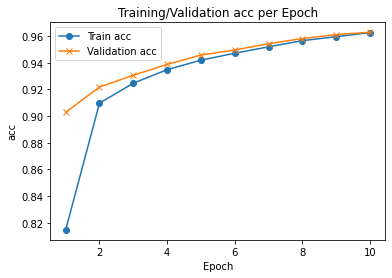

In [24]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history["accuracy"], "o-")
ax.plot([None] + hist.history["val_accuracy"], "x-")
# Plot legend and use the best location automatically: loc = 0.
ax.legend(["Train acc", "Validation acc"], loc = 0)
ax.set_title("Training/Validation acc per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("acc")

In [29]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0, 0.5, 'Loss')

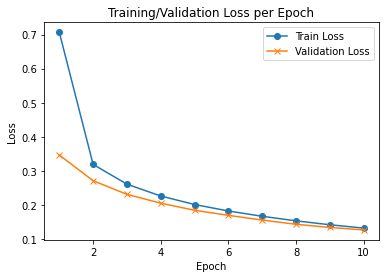

In [31]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history["loss"], "o-")
ax.plot([None] + hist.history["val_loss"], "x-")
# Plot legend and use the best location automatically: loc = 0.
ax.legend(["Train Loss", "Validation Loss"], loc = 0)
ax.set_title("Training/Validation Loss per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")